###### In this notebook, I will be importing my cleaned data and trying a simple logistic regression model. To begin, I will be testing my data by applying a linear regression to the data without attempting any NLP methods to the comment data. This is to verify that my code is working and producing results as this analysis runs very quickly, so I can check that any changes to my data cleaning code have not passed errors forward.

After I verify that the first model runs, I will use the text data from the 'commentBody' column and attempt NLP-based analysis of this data. I expect to see that the second model will produce superior results as it actually looks at the textual data.

In [23]:
import pandas as pd
import numpy as np
import nltk
#ntlk.download()
import re
sent_token = nltk.sent_tokenize
import csv  
from nltk import sent_tokenize, word_tokenize, pos_tag
import re
from sklearn.feature_extraction.text import CountVectorizer
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

file_path_art = r'C:\Users\msteele9\Documents\Springboard\Springboard\Data\cleaned_article_data.csv'
clean_art = pd.read_csv(file_path_art, index_col = False)
clean_art

file_path_comments = r'C:\Users\msteele9\Documents\Springboard\Springboard\Data\cleaned_comment_data.csv'
clean_comments = pd.read_csv(file_path_comments, index_col = False)

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

features = clean_comments.columns.tolist()
output = 'recommendations'
features.remove('recommendations')

for column in clean_comments.columns:
    clean_comments[column] = clean_comments[column].astype(str)
    if clean_comments[column].dtype == type(object):
        clean_comments[column] = le.fit_transform(clean_comments[column])

#print(features)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

clean_comments.astype(float)
clean_comments.head(5)

#clean_comments.dtypes

,approveDate,commentBody,commentID,commentSequence,commentType,createDate,depth,editorsSelection,parentID,parentUserDisplayName,permID,picURL,recommendations,replyCount,sharing,trusted,updateDate,userDisplayName,userID,userLocation,inReplyTo,articleID,sectionName,newDesk,articleWordCount,printPage,typeOfMaterial
0,4183,8195,8329,8329,0,8081,0,0,0,887,8671,17,110,0,0,0,4385,4112,1801,1639,0,0,7,4,29,4,1
1,3457,6605,7166,7166,0,6940,0,0,0,887,7306,17,1,0,0,0,3648,4600,975,267,0,0,7,4,29,4,1
2,3456,1089,7160,7160,0,6934,0,0,0,887,7301,17,167,0,0,0,3647,3254,3698,1603,0,0,7,4,29,4,1
3,3292,5470,6606,6606,0,6388,0,0,0,887,6844,17,298,11,0,0,3473,4795,108,1187,0,0,7,4,29,4,1
4,3291,1347,6385,6385,0,6176,0,0,0,887,6688,14,243,0,0,0,3472,2341,3302,2016,0,0,7,4,29,4,1


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import random
from datetime import datetime

X_train, X_test, y_train, y_test = train_test_split(
    clean_comments[features], clean_comments[output], test_size=0.2, random_state=random.seed(datetime.now()))

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Score: \n', lm.score(X_test, y_test))

coef_df = pd.DataFrame({'features': features, 'estimatedCoefficients': abs(lm.coef_)})[['features', 'estimatedCoefficients']]
coef_df.sort_values(by=['estimatedCoefficients'], ascending=False)

Coefficients: 
 [-2.27989858e-02 -5.73231343e-05  6.69686044e-02  6.69686044e-02
 -3.31294151e+01 -1.41200938e-01  1.61614397e+01  4.10320562e+01
  9.48229987e-03  2.15837093e-03  9.04175100e-03  9.54934009e-03
  1.66070873e+00  6.43409218e+00  7.93313174e+00  4.29322157e-03
 -5.86557740e-04 -2.56441226e-03  2.62254137e-03  9.48229984e-03
 -9.83779009e-01 -6.07987206e+00 -1.52804816e-01 -5.08157038e-01
 -4.43706859e-01  3.07800012e+01]
Mean squared error: 11135.37
Score: 
 0.10272728095485184


,features,estimatedCoefficients
7,editorsSelection,41.032056
4,commentType,33.129415
25,typeOfMaterial,30.780001
6,depth,16.161440
14,trusted,7.933132
13,sharing,6.434092
21,sectionName,6.079872
12,replyCount,1.660709
20,articleID,0.983779
23,articleWordCount,0.508157


Text(0.5, 1.0, 'Coefficients of each feature')

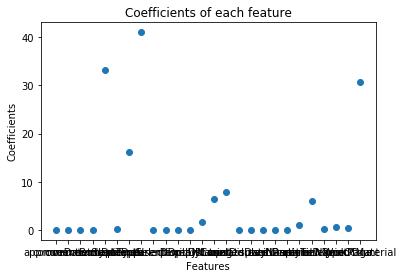

In [26]:
import matplotlib.pyplot as plt

plt.scatter(coef_df.features, coef_df.estimatedCoefficients)
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Coefficients of each feature")

In [27]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Score: \n', lm.score(X_test, y_test))

C:\Users\msteele9\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\msteele9\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Coefficients: 
 [[ 1.09762203e-03 -2.00726734e-05  3.32096443e-03 ... -1.93340873e-03
  -3.89675746e-02 -7.03225547e-01]
 [ 1.51174250e-03 -1.01494612e-05  6.97293726e-03 ... -1.53004219e-02
   3.62004087e-02 -8.48023196e-02]
 [ 9.64317318e-04 -4.65258759e-05  7.54337722e-03 ... -1.70560237e-02
   1.30226516e-02  2.55254730e-01]
 ...
 [-1.15050903e-02 -4.79234808e-03 -1.94998805e-02 ... -1.14441427e-03
  -2.14376954e-04 -5.63436084e-05]
 [ 3.42809963e-03  2.18944954e-03 -1.84091447e-01 ... -1.28247254e-01
  -6.51328482e-01  4.14110325e-02]
 [ 3.75544034e-03 -2.74872830e-04 -1.24471037e-02 ...  1.50271569e-03
  -5.74508288e-02  4.40466066e-02]]
Mean squared error: 23176.23
Score: 
 0.2015


C:\Users\msteele9\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


###### This model doesn't take the comment text into account, so we expect that the accuracy score results will be quite bad. Next we apply a logistic regression to the comment data.

In [18]:
clean_comments = pd.read_csv(file_path_comments, index_col = False)
X = clean_comments['commentBody']
y = clean_comments['recommendations']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random.seed(datetime.now()))

from sklearn.feature_extraction.text import CountVectorizer

# Setting the vectorizer just like we would set a model 
cvec = CountVectorizer(stop_words='english')
# Fitting the vectorizer on our training data 
cvec.fit(X_train)

X_train_df = pd.DataFrame(cvec.transform(X_train).todense(),
                       columns=cvec.get_feature_names())

X_test_df = pd.DataFrame(cvec.transform(X_test).todense(),
                      columns=cvec.get_feature_names())

word_counts = X_train_df.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

trump         2884
people        2525
like          1808
just          1391
dont          1118
think          975
time           865
man            852
tax            769
know           737
money          726
women          724
way            717
make           680
good           646
need           643
years          607
going          595
does           590
government     573
dtype: int64

###### What we have after this step is an array of columns, where each row is one comment and each column represents the frequency of one possible word in that column. The word_counts output from the previous step lists the most common words in this data set.

In [20]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
ln = LinearRegression()
ln.fit(X_train_df, y_train)

y_pred = ln.predict(X_test_df)

print('Score: \n', ln.score(X_test_df, y_test))


Score: 
 -1.7985385603635418e+21
Wall time: 3min


In [28]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train_df, y_train)

y_pred = lor.predict(X_test_df)

print('Score: \n', lor.score(X_test_df, y_test))

C:\Users\msteele9\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\msteele9\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Score: 
 0.1475
Wall time: 22.8 s


###### My linear regression seems to fail at this point. I'm going to try some sentiment analysis istead to see if I can figure out what's going on.

In [30]:
from textblob import TextBlob

comment['sentiment'] = clean_comments.commentBody.map(lambda text: TextBlob(text).sentiment.polarity)

ModuleNotFoundError: No module named 'textblob'